# Explore here

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

In [1]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import os
from sklearn.metrics import *
from imblearn.metrics import specificity_score





In [2]:
os.getcwd()

'/workspaces/Arboles_/src'

***Análisis Exploratorio***

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.duplicated().sum()

0

In [5]:
sum(data.isnull().sum())

0

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 640x480 with 0 Axes>

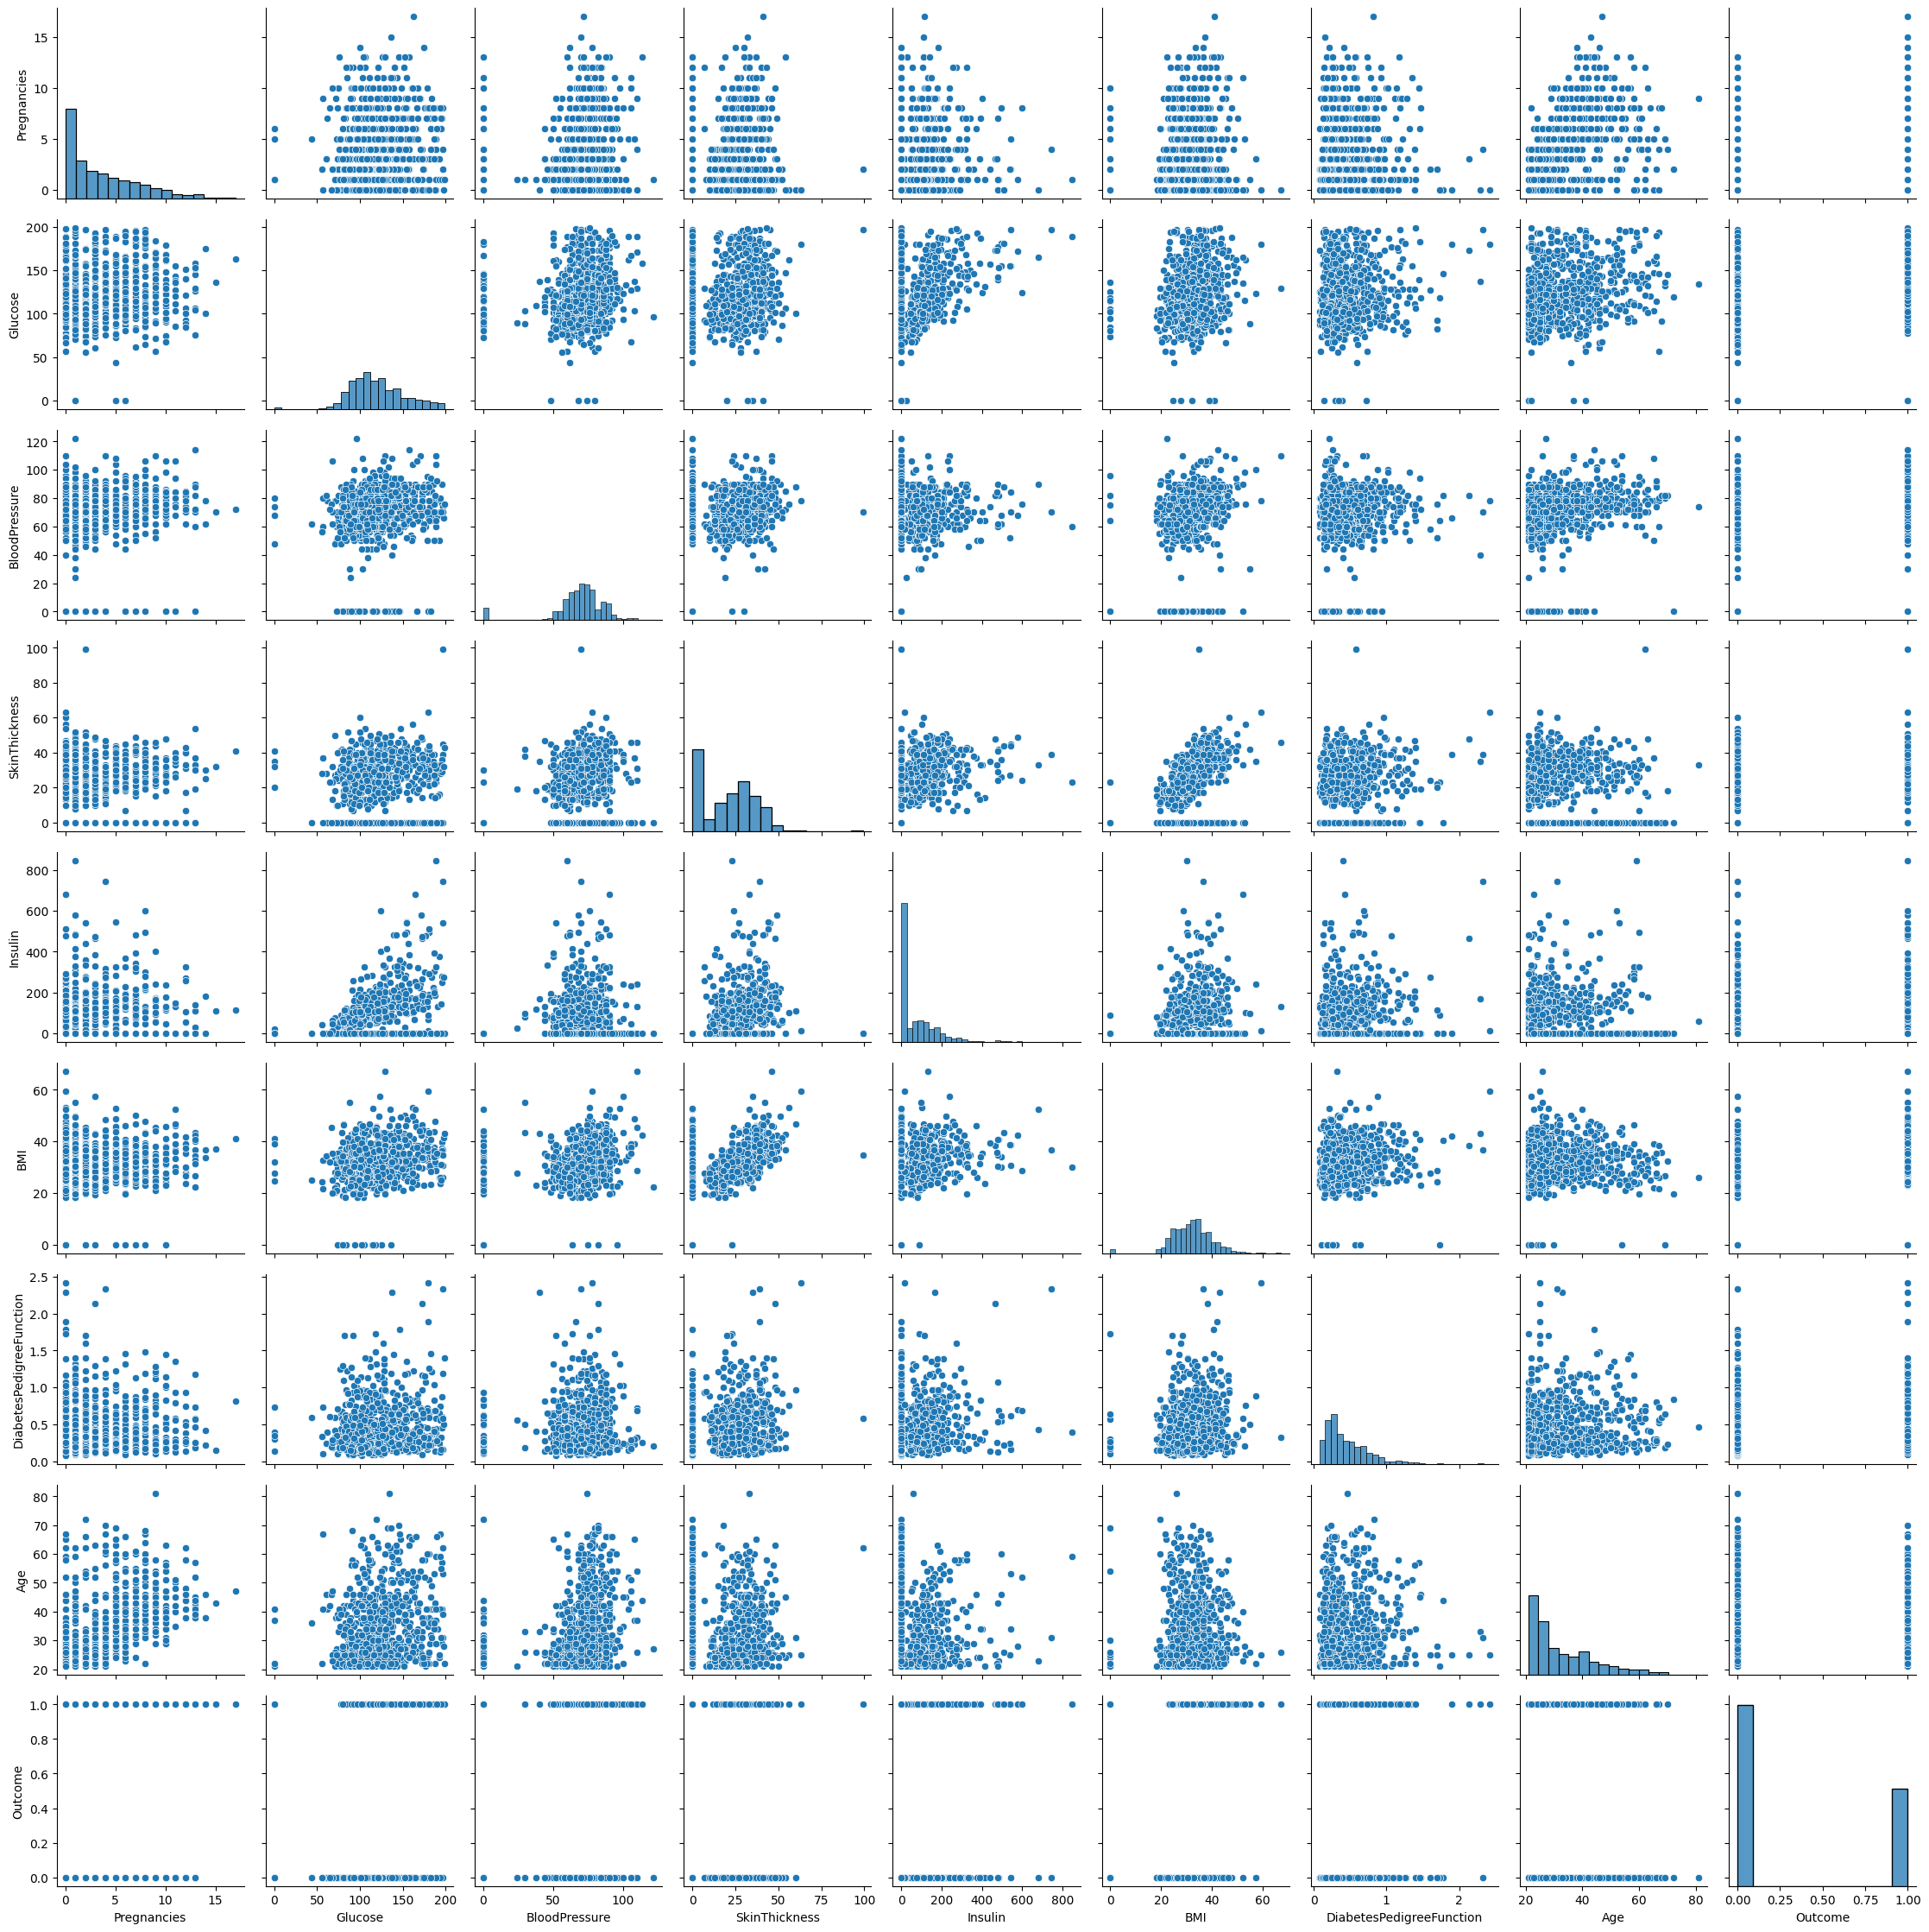

In [11]:

plt.suptitle("Relación Entre Variables", y=1.02)
pairplot = sns.pairplot(data)
plt.tight_layout()
plt.show()

Escalado de Datos solo para plotear.

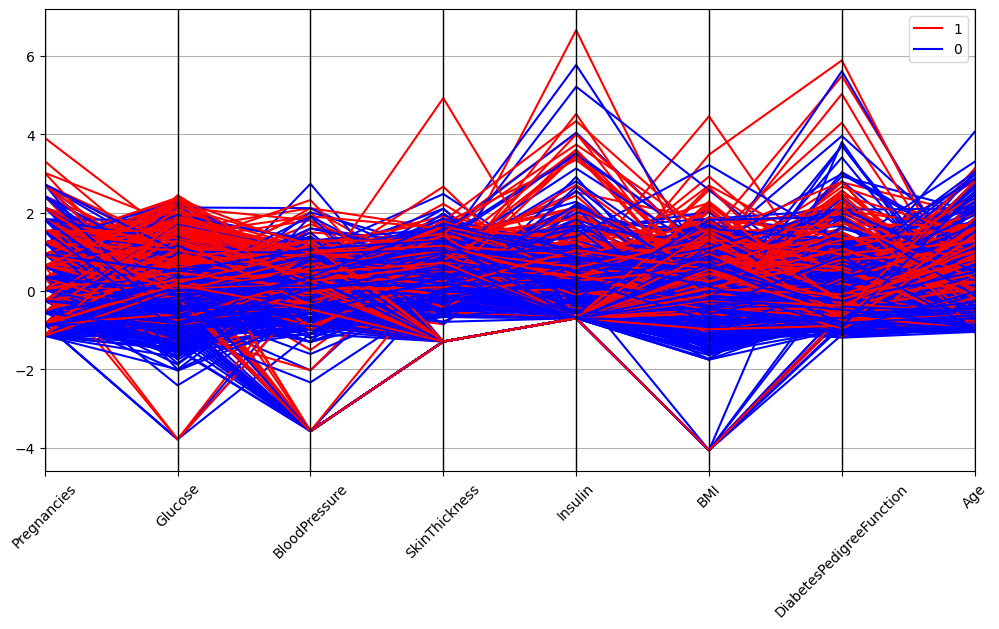

In [12]:

# Relación entre las características de nuestro dataset escalado:

data_sc = pd.DataFrame(data=StandardScaler().fit_transform(data.drop(['Outcome'], axis=1)), columns=data.columns[:-1])
data_sc['Outcome'] = data.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()


**Selección de Características**

 El mínimo de Blood Pressure y de varios otros valores == 0, lo que sugiere que es una persona sin signos vitales o que hay erroes en la medición. 

 Se buscan esos valores en el Data Frame:

In [13]:
no_vit_signs = [x for x in data.BloodPressure if x == 0]
print(f"Hay {len(no_vit_signs)} personas con Blood Pressure == 0")

Hay 35 personas con Blood Pressure == 0


In [14]:
data.loc[data['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [15]:
len(data.loc[(data['BloodPressure'] == 0) & (data['Outcome'] == 0)])

19

In [16]:
# Se eliminan las filas para las que Blood Pressure = 0.
data.drop(data[data['BloodPressure'] == 0].index, inplace=True)
data.shape

(733, 9)

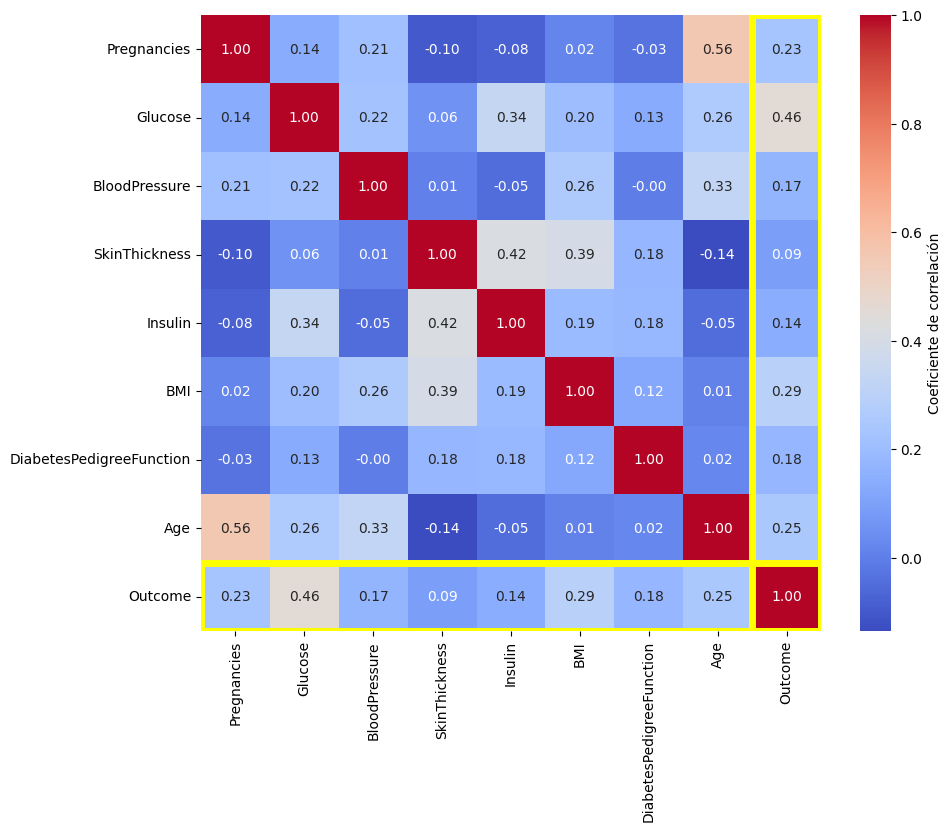

In [17]:
def corr_highlighted_target(dataframe, target):
    corr = dataframe.corr()
    # Generar el mapa de calor de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de correlación'})

    # Resaltar la columna y fila de la variable objetivo
    # Encontrar el índice de la variable objetivo en las columnas
    target_index = dataframe.columns.tolist().index(target)

    # Cambiar el color de la columna y fila correspondiente a la variable objetivo // (gracias chat gpt )
    plt.gca().add_patch(plt.Rectangle((target_index, 0), 1, len(corr), fill=False, edgecolor='yellow', lw=5))
    plt.gca().add_patch(plt.Rectangle((0, target_index), len(corr), 1, fill=False, edgecolor='yellow', lw=5))

    plt.show()

corr_highlighted_target(data, 'Outcome')

In [18]:
corr = data.corr()
corr.Outcome

Pregnancies                 0.230619
Glucose                     0.458410
BloodPressure               0.170589
SkinThickness               0.092587
Insulin                     0.143465
BMI                         0.290653
DiabetesPedigreeFunction    0.178271
Age                         0.248376
Outcome                     1.000000
Name: Outcome, dtype: float64

In [19]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance*100}')

Feature: Glucose, Importance: 25.29529631137848
Feature: BMI, Importance: 15.524566173553467
Feature: Age, Importance: 15.255573391914368
Feature: Insulin, Importance: 13.668327033519745
Feature: DiabetesPedigreeFunction, Importance: 10.87193638086319
Feature: SkinThickness, Importance: 7.646385580301285
Feature: BloodPressure, Importance: 6.984369456768036
Feature: Pregnancies, Importance: 4.7535490244627


Elimino las características menos relevantes y ya me quedo con las variables y las observaciones que le pasaré al modelo:

In [21]:
ls_vars_low_corr = corr[corr['Outcome'].abs() <= 0.15].index
print(f"Las variables que presentan menos relevancia y que por ende eliminaré son: {[x for x in ls_vars_low_corr if sorted_feature_importance[x] <= 0.1]}")


Las variables que presentan menos relevancia y que por ende eliminaré son: ['SkinThickness']


In [22]:
#Prueba con SelectKBest para comparación de Resultados: 

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)


X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,106.0,82.0,0.0,39.5,0.286,38.0
1,8.0,109.0,76.0,114.0,27.9,0.640,31.0
2,6.0,129.0,90.0,326.0,19.6,0.582,60.0
3,3.0,90.0,78.0,0.0,42.7,0.559,21.0
4,6.0,102.0,82.0,0.0,30.8,0.180,36.0


Tras aplicar el EDA la selección de características, tanto con SelecrKBest como con la correlación + XGBRegressor, decido eliminar la variable
'SkinThickness'

In [23]:
data.drop("SkinThickness", axis=1)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


***Modelización***

In [24]:
model = DecisionTreeClassifier(random_state = 42, max_depth=100, min_samples_leaf=1)
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(max_depth=100, random_state=42)

In [25]:
y_pred_train = model.predict(X_train_sel)
y_pred_test = model.predict(X_test_sel)


In [26]:

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))


1.0
0.7278911564625851


In [27]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])
    
    return metrics_df

In [28]:
get_metrics(y_train, y_test, y_pred_train, y_pred_test )

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
Test,0.727891,0.642857,0.715054,0.62069,0.666667,0.763441
Diferencia,0.272109,0.357143,0.284946,0.37931,0.333333,0.236559


*REFERENCIAS*

***Accuracy (Exactitud):*** La proporción de predicciones correctas sobre el total de predicciones realizadas.

***F1 Score (Puntuación F1):*** Una medida del equilibrio entre la precisión y el recall.

***AUC (Area Under the Curve):*** El área bajo la curva ROC, que es una medida de la capacidad discriminativa del modelo.

***Precision (Precisión):*** La proporción de verdaderos positivos sobre el total de predicciones positivas realizadas.

***Recall (Sensibilidad):*** La proporción de verdaderos positivos sobre el total de casos positivos reales.

***Specificity (Especificidad):*** La proporción de verdaderos negativos sobre el total de casos negativos reales.

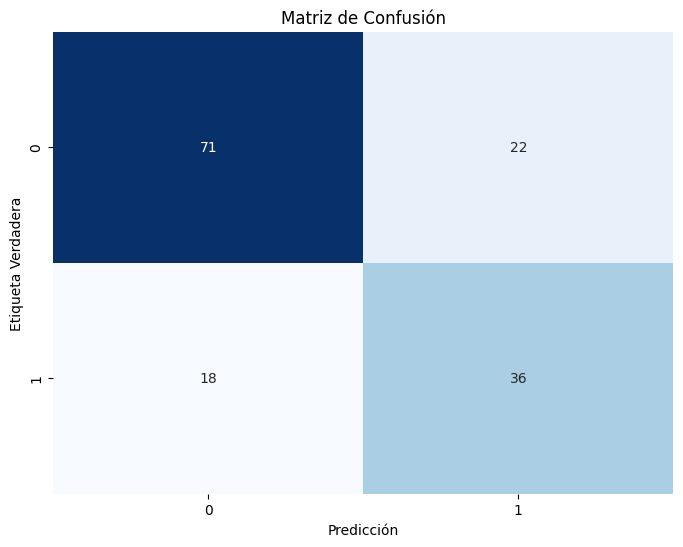

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()


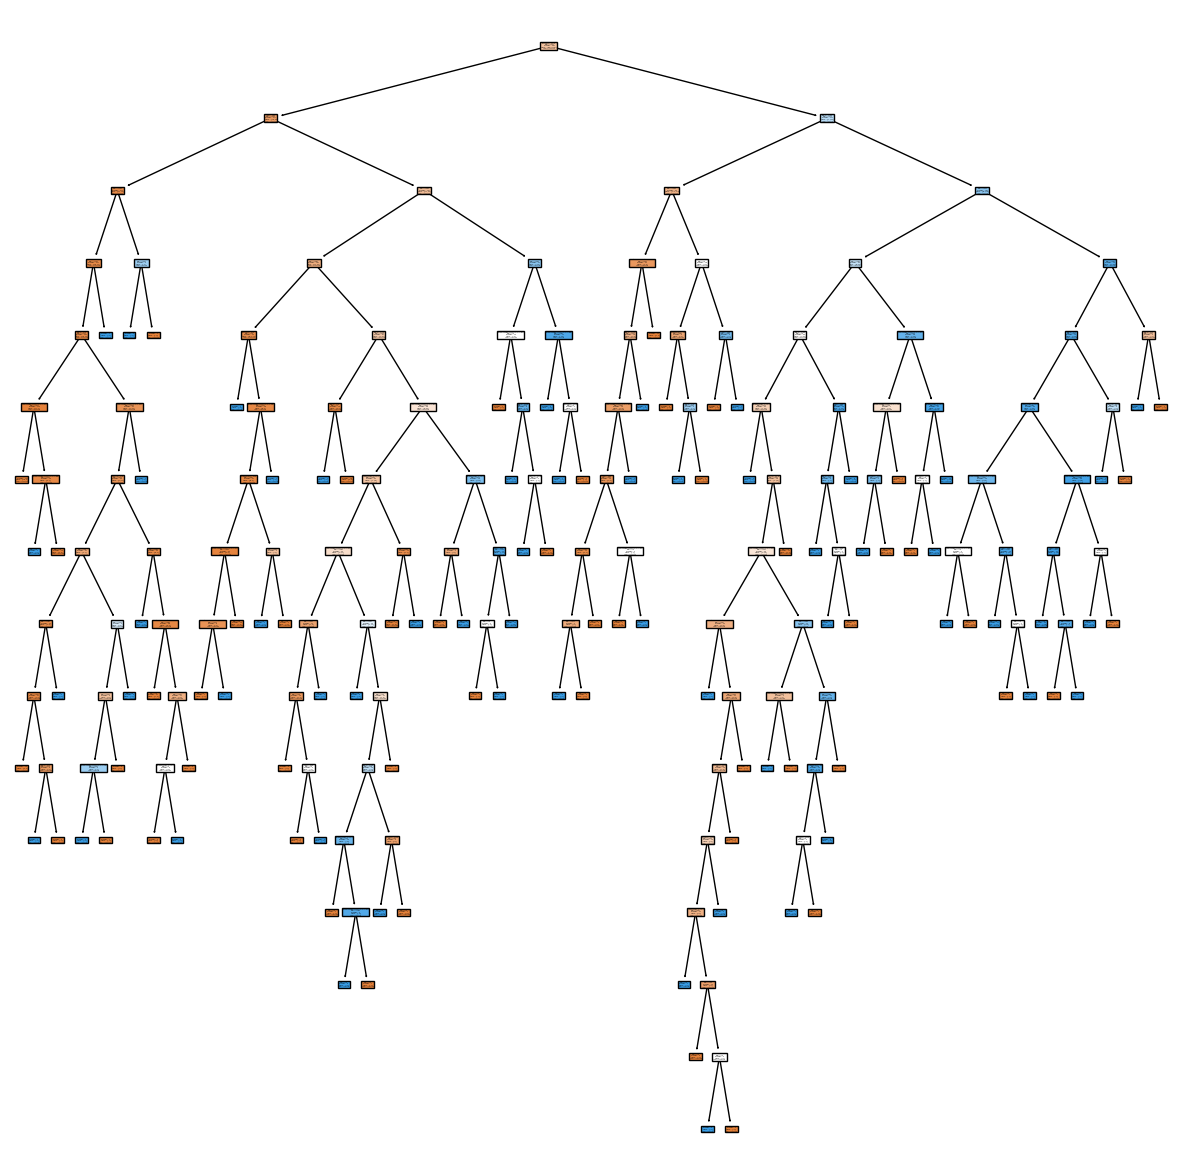

In [30]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = [ "Negativo", "Positivo"], filled = True)

plt.show()

|Búsqueda de Hiperparámetros| 
-----------------------

In [31]:
hp_dic = {'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None], 
    'splitter': ['best', 'random']}

random_search= RandomizedSearchCV(estimator=model,param_distributions=hp_dic, n_iter=100, cv=5, random_state=10, n_jobs=1, scoring='f1', verbose=1 )
random_search.fit(X_train_sel, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=100,
                                                    random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5c5ca576a0>,
                                        'max_features': [None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5c5ca17f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5c57e73430>,
                                        'splitter': ['best', 'random']},
                   random_state=10, scoring='f1', verbose=1)

In [32]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=16,
                       min_samples_split=9, random_state=42)

In [33]:
best_estimators = random_search.best_estimator_

In [34]:
y_test_pred_opt = best_estimators.predict(X_test_sel)
y_train_pred_opt = best_estimators.predict(X_train_sel)

In [35]:
get_metrics(y_train, y_test, y_train_pred_opt, y_test_pred_opt )

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.822526,0.695906,0.768289,0.826389,0.601010,0.935567
Test,0.748299,0.618557,0.707885,0.697674,0.555556,0.860215
Diferencia,0.074226,0.077350,0.060403,0.128714,0.045455,0.075352


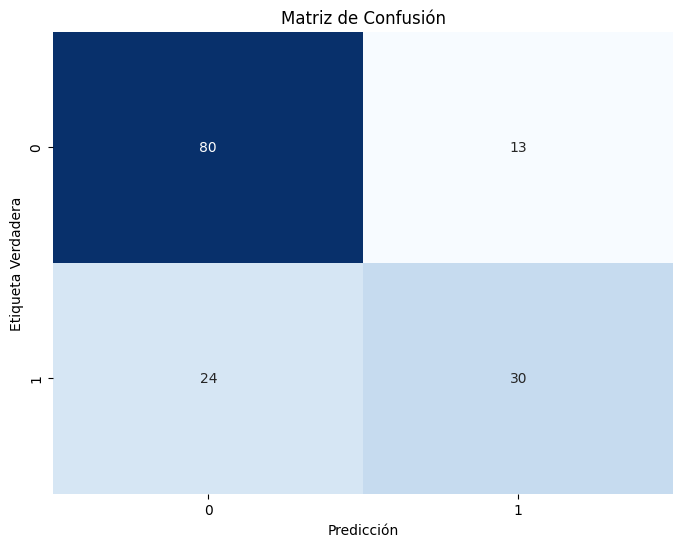

In [36]:
conf_matrix = confusion_matrix(y_test, y_test_pred_opt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

***Se observa que la precisión en el conjunto de pruebas aumenta mientras que la precisión en el conjunto de entrenamiento disminuye después de ajustar los hiperparámetros.***
***Sin embargo la brecha entre el rendimiento del conjunto de entrenamiento y el conjunto de pruebas se reduce.***

Esto podría arrojar algunas conclusiones: Menos sobreajuste, Mayor generalización, Más representatividad del conjunto de pruebas



In [37]:
train_save = X_train_sel
test_save = X_test_sel

train_save["Outcome"] = y_train.values
test_save["Outcome"] = y_test.values
train_save.to_csv("../data/processed/clean_train.csv", index = False)
test_save.to_csv("../data/processed/clean_test.csv", index = False)
